In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
import seaborn as sns

In [44]:
def scatter_function(x_values, y_values, title, x_label, y_label):
    """Creates a scatter plot using Seaborn, with the following inputs:
    x-values, y-values, title, x-axis label, y-axis label"""
    plt.figure(figsize=(10,8))
    ax = sns.scatterplot(x_values, y_values, color = 'mediumblue')
    ax.set_xlim(x_values.min(), x_values.max())
    ax.set_ylim(y_values.min(), y_values.max())
    plt.title(title, fontsize = 18)
    plt.xticks(rotation = 45, fontsize = 14, horizontalalignment="right")
    plt.xlabel(x_label, fontsize = 18)
    plt.yticks(fontsize = 14)
    plt.ylabel(y_label, fontsize = 18)
    plt.tight_layout()

In [29]:
weather_data_a = pd.read_csv('mpi_roof_2019a.csv', encoding='latin1')
weather_data_b = pd.read_csv('mpi_roof_2019b.csv', encoding='latin1')


In [30]:
weather_data_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26064 entries, 0 to 26063
Data columns (total 22 columns):
Date Time               26064 non-null object
p (mbar)                26064 non-null float64
T (degC)                26064 non-null float64
Tpot (K)                26064 non-null float64
Tdew (degC)             26064 non-null float64
rh (%)                  26064 non-null float64
VPmax (mbar)            26064 non-null float64
VPact (mbar)            26064 non-null float64
VPdef (mbar)            26064 non-null float64
sh (g/kg)               26064 non-null float64
H2OC (mmol/mol)         26064 non-null float64
rho (g/m**3)            26064 non-null float64
wv (m/s)                26064 non-null float64
max. wv (m/s)           26064 non-null float64
wd (deg)                26064 non-null float64
rain (mm)               26064 non-null float64
raining (s)             26064 non-null float64
SWDR (W/m²)             26064 non-null float64
PAR (µmol/m²/s)         26064 non-null float64

In [31]:
weather_data_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 22 columns):
Date Time               26496 non-null object
p (mbar)                26496 non-null float64
T (degC)                26496 non-null float64
Tpot (K)                26496 non-null float64
Tdew (degC)             26496 non-null float64
rh (%)                  26496 non-null float64
VPmax (mbar)            26496 non-null float64
VPact (mbar)            26496 non-null float64
VPdef (mbar)            26496 non-null float64
sh (g/kg)               26496 non-null float64
H2OC (mmol/mol)         26496 non-null float64
rho (g/m**3)            26496 non-null float64
wv (m/s)                26496 non-null float64
max. wv (m/s)           26496 non-null float64
wd (deg)                26496 non-null float64
rain (mm)               26496 non-null float64
raining (s)             26496 non-null float64
SWDR (W/m²)             26496 non-null float64
PAR (µmol/m²/s)         26496 non-null float64

In [40]:
weather_data = pd.concat([weather_data_a, weather_data_b], ignore_index = True)

In [41]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 22 columns):
Date Time               52560 non-null object
p (mbar)                52560 non-null float64
T (degC)                52560 non-null float64
Tpot (K)                52560 non-null float64
Tdew (degC)             52560 non-null float64
rh (%)                  52560 non-null float64
VPmax (mbar)            52560 non-null float64
VPact (mbar)            52560 non-null float64
VPdef (mbar)            52560 non-null float64
sh (g/kg)               52560 non-null float64
H2OC (mmol/mol)         52560 non-null float64
rho (g/m**3)            52560 non-null float64
wv (m/s)                52560 non-null float64
max. wv (m/s)           52560 non-null float64
wd (deg)                52560 non-null float64
rain (mm)               52560 non-null float64
raining (s)             52560 non-null float64
SWDR (W/m²)             52560 non-null float64
PAR (µmol/m²/s)         52560 non-null float64

In [42]:
weather_data.head()


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,01.01.2019 00:10:00,1003.45,6.94,279.82,5.54,90.8,9.98,9.07,0.92,5.64,...,1.92,2.60,243.9,0.0,0.0,0.0,0.0,0.0,18.45,421.6
1,01.01.2019 00:20:00,1003.23,6.94,279.84,5.50,90.5,9.99,9.04,0.95,5.62,...,1.60,2.72,237.1,0.0,0.0,0.0,0.0,0.0,18.40,420.6
2,01.01.2019 00:30:00,1003.14,6.98,279.89,5.47,90.1,10.01,9.02,0.99,5.61,...,1.53,2.68,240.9,0.0,0.0,0.0,0.0,0.0,18.35,420.0
3,01.01.2019 00:40:00,1003.02,6.99,279.91,5.42,89.7,10.02,8.99,1.03,5.59,...,1.27,2.48,233.6,0.0,0.0,0.0,0.0,0.0,18.29,419.8
4,01.01.2019 00:50:00,1002.87,7.00,279.93,5.33,89.1,10.03,8.93,1.09,5.56,...,1.29,2.46,216.3,0.0,0.0,0.0,0.0,0.0,18.25,419.4


In [43]:
weather_data[weather_data.columns[0:15]]


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2019 00:10:00,1003.45,6.94,279.82,5.54,90.8,9.98,9.07,0.92,5.64,9.04,1243.74,1.92,2.60,243.9
1,01.01.2019 00:20:00,1003.23,6.94,279.84,5.50,90.5,9.99,9.04,0.95,5.62,9.01,1243.47,1.60,2.72,237.1
2,01.01.2019 00:30:00,1003.14,6.98,279.89,5.47,90.1,10.01,9.02,0.99,5.61,8.99,1243.18,1.53,2.68,240.9
3,01.01.2019 00:40:00,1003.02,6.99,279.91,5.42,89.7,10.02,8.99,1.03,5.59,8.96,1243.01,1.27,2.48,233.6
4,01.01.2019 00:50:00,1002.87,7.00,279.93,5.33,89.1,10.03,8.93,1.09,5.56,8.91,1242.80,1.29,2.46,216.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52555,31.12.2019 23:20:00,1008.59,0.64,273.13,-1.57,85.1,6.40,5.44,0.95,3.36,5.40,1280.64,2.47,2.76,226.1
52556,31.12.2019 23:30:00,1008.81,0.13,272.61,-1.87,86.3,6.17,5.32,0.84,3.29,5.28,1283.34,1.44,2.52,206.4
52557,31.12.2019 23:40:00,1008.94,0.14,272.61,-1.55,88.3,6.17,5.45,0.72,3.37,5.40,1283.41,1.10,2.36,208.6
52558,31.12.2019 23:50:00,1008.99,0.44,272.90,-1.32,87.9,6.31,5.54,0.76,3.42,5.49,1282.02,0.81,1.36,219.2


In [46]:
weather_data['date_time'] = pd.to_datetime(weather_data['Date Time'], format='%d.%m.%Y %H:%M:%S')
weather_data.drop(['Date Time'], axis = 1, inplace = True)
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 22 columns):
p (mbar)                52560 non-null float64
T (degC)                52560 non-null float64
Tpot (K)                52560 non-null float64
Tdew (degC)             52560 non-null float64
rh (%)                  52560 non-null float64
VPmax (mbar)            52560 non-null float64
VPact (mbar)            52560 non-null float64
VPdef (mbar)            52560 non-null float64
sh (g/kg)               52560 non-null float64
H2OC (mmol/mol)         52560 non-null float64
rho (g/m**3)            52560 non-null float64
wv (m/s)                52560 non-null float64
max. wv (m/s)           52560 non-null float64
wd (deg)                52560 non-null float64
rain (mm)               52560 non-null float64
raining (s)             52560 non-null float64
SWDR (W/m²)             52560 non-null float64
PAR (µmol/m²/s)         52560 non-null float64
max. PAR (µmol/m²/s)    52560 non-null float6

In [47]:
weather_data.drop_duplicates(keep = 'first', inplace  = True)

In [48]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52560 entries, 0 to 52559
Data columns (total 22 columns):
p (mbar)                52560 non-null float64
T (degC)                52560 non-null float64
Tpot (K)                52560 non-null float64
Tdew (degC)             52560 non-null float64
rh (%)                  52560 non-null float64
VPmax (mbar)            52560 non-null float64
VPact (mbar)            52560 non-null float64
VPdef (mbar)            52560 non-null float64
sh (g/kg)               52560 non-null float64
H2OC (mmol/mol)         52560 non-null float64
rho (g/m**3)            52560 non-null float64
wv (m/s)                52560 non-null float64
max. wv (m/s)           52560 non-null float64
wd (deg)                52560 non-null float64
rain (mm)               52560 non-null float64
raining (s)             52560 non-null float64
SWDR (W/m²)             52560 non-null float64
PAR (µmol/m²/s)         52560 non-null float64
max. PAR (µmol/m²/s)    52560 non-null float6

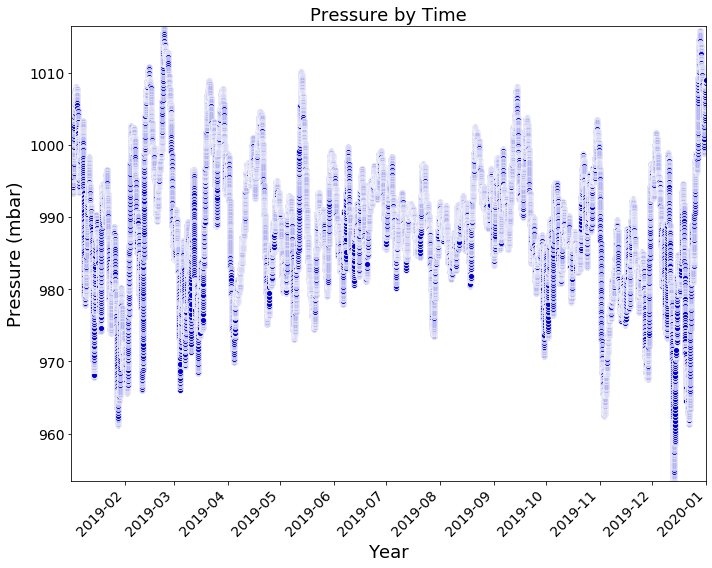

In [49]:
scatter_function(weather_data['date_time'], weather_data['p (mbar)'], 'Pressure by Time', 'Year', 'Pressure (mbar)')



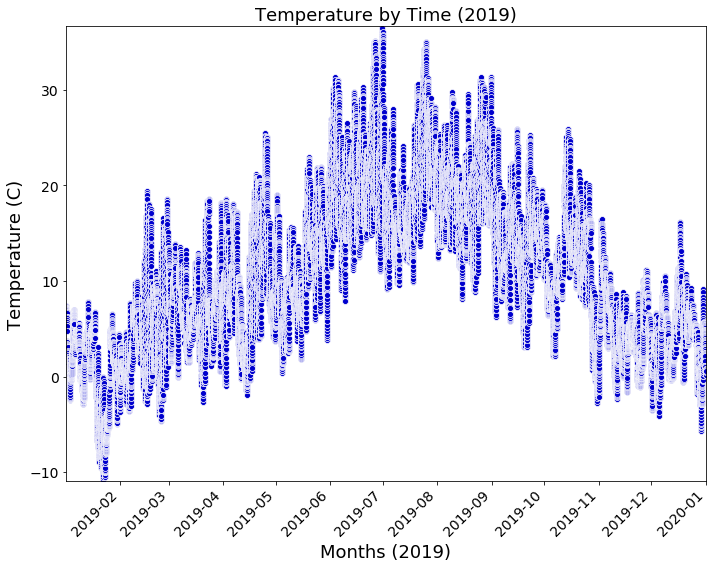

In [64]:
scatter_function(weather_data['date_time'], weather_data['T (degC)'], 'Temperature by Time (2019)', 'Months (2019)', 'Temperature (C)')
plt.savefig('images/temp_vs_time_2019.png')


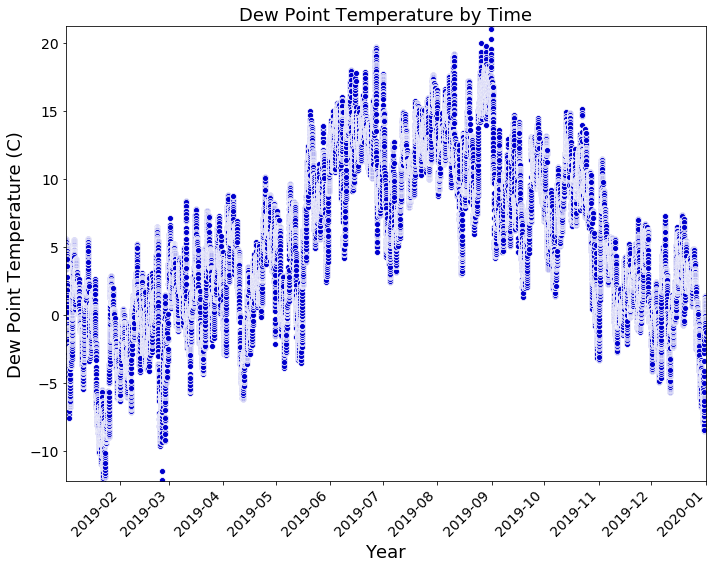

In [51]:
scatter_function(weather_data['date_time'], weather_data['Tdew (degC)'], 'Dew Point Temperature by Time', 'Year', 'Dew Point Temperature (C)')


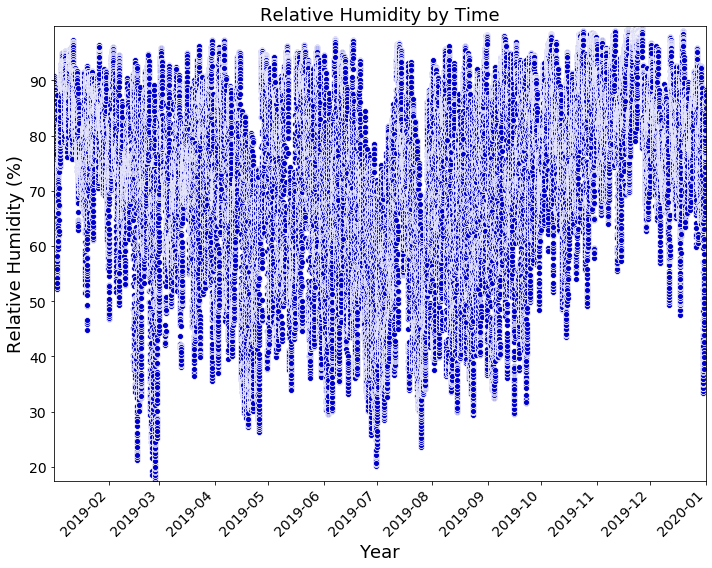

In [52]:
scatter_function(weather_data['date_time'], weather_data['rh (%)'], 'Relative Humidity by Time', 'Year', 'Relative Humidity (%)')


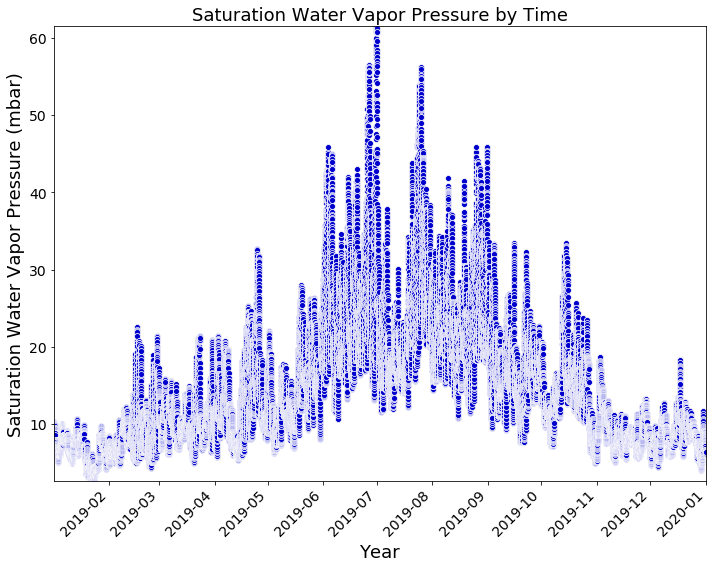

In [53]:
scatter_function(weather_data['date_time'], weather_data['VPmax (mbar)'], 'Saturation Water Vapor Pressure by Time', 'Year', 'Saturation Water Vapor Pressure (mbar)')


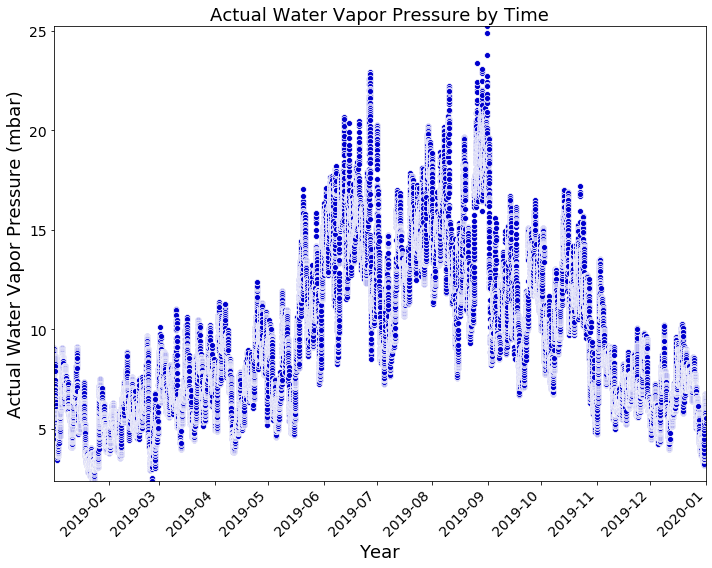

In [54]:
scatter_function(weather_data['date_time'], weather_data['VPact (mbar)'], 'Actual Water Vapor Pressure by Time', 'Year', 'Actual Water Vapor Pressure (mbar)')


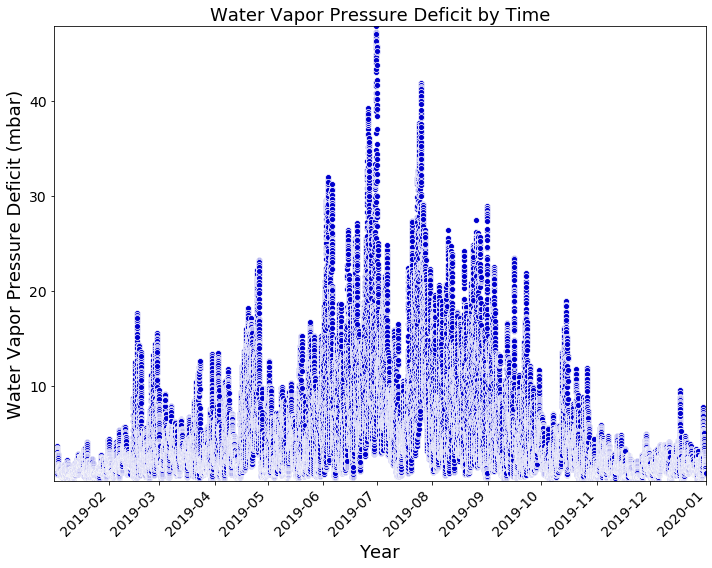

In [55]:
scatter_function(weather_data['date_time'], weather_data['VPdef (mbar)'], 'Water Vapor Pressure Deficit by Time', 'Year', 'Water Vapor Pressure Deficit (mbar)')


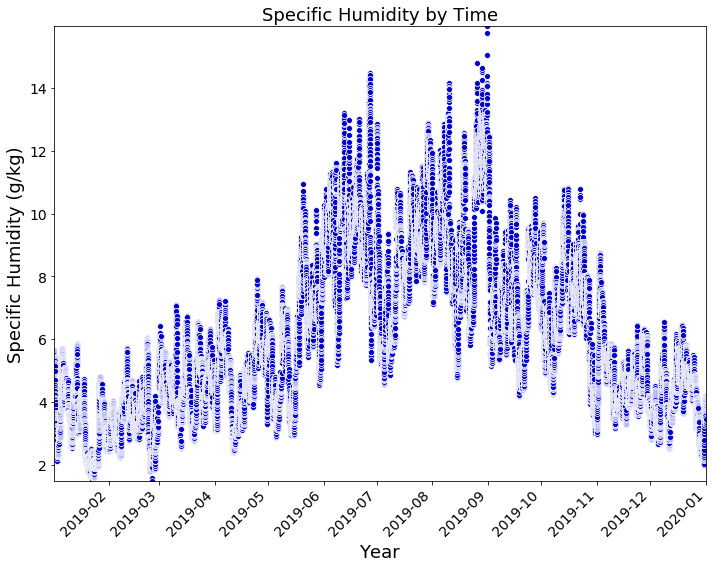

In [56]:
scatter_function(weather_data['date_time'], weather_data['sh (g/kg)'], 'Specific Humidity by Time', 'Year', 'Specific Humidity (g/kg)')


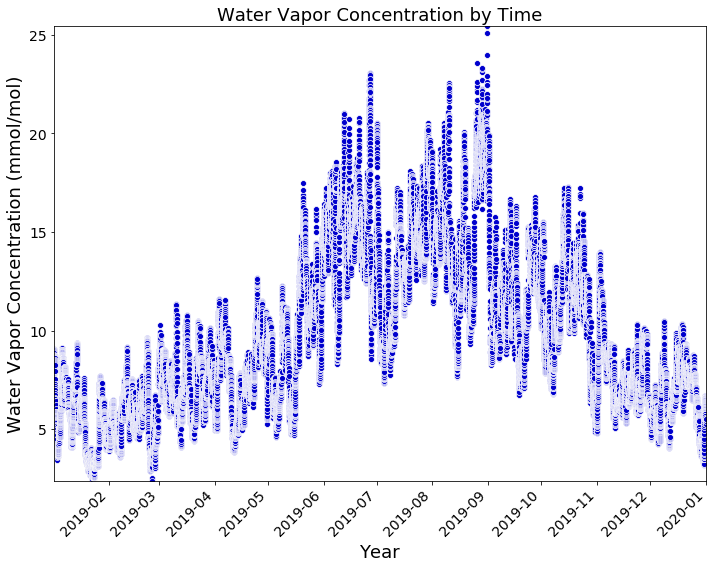

In [57]:
scatter_function(weather_data['date_time'], weather_data['H2OC (mmol/mol)'], 'Water Vapor Concentration by Time', 'Year', 'Water Vapor Concentration (mmol/mol)')


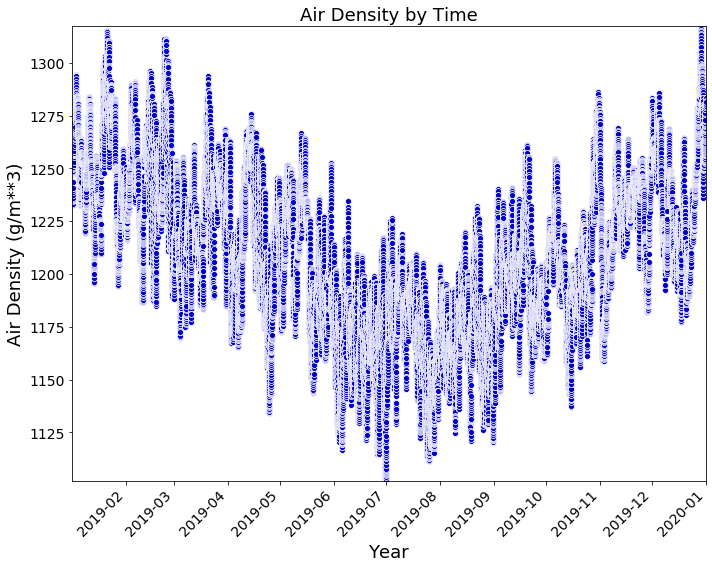

In [58]:
scatter_function(weather_data['date_time'], weather_data['rho (g/m**3)'], 'Air Density by Time', 'Year', 'Air Density (g/m**3)')


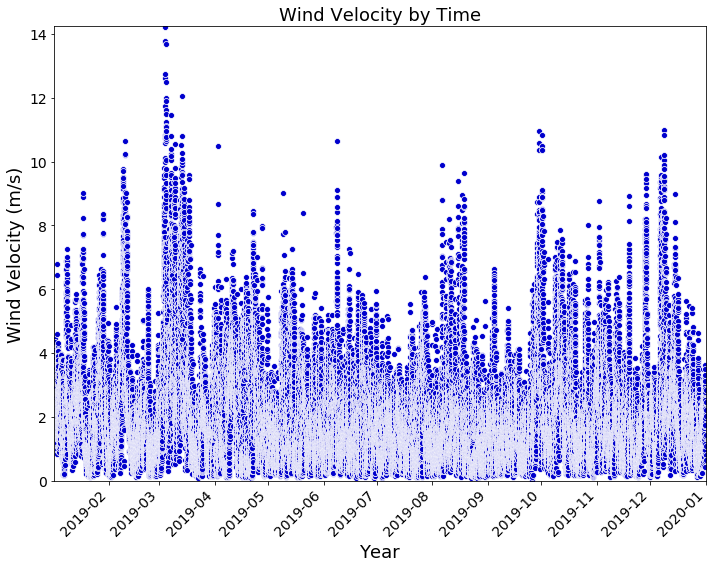

In [59]:
scatter_function(weather_data['date_time'], weather_data['wv (m/s)'], 'Wind Velocity by Time', 'Year', 'Wind Velocity (m/s)')


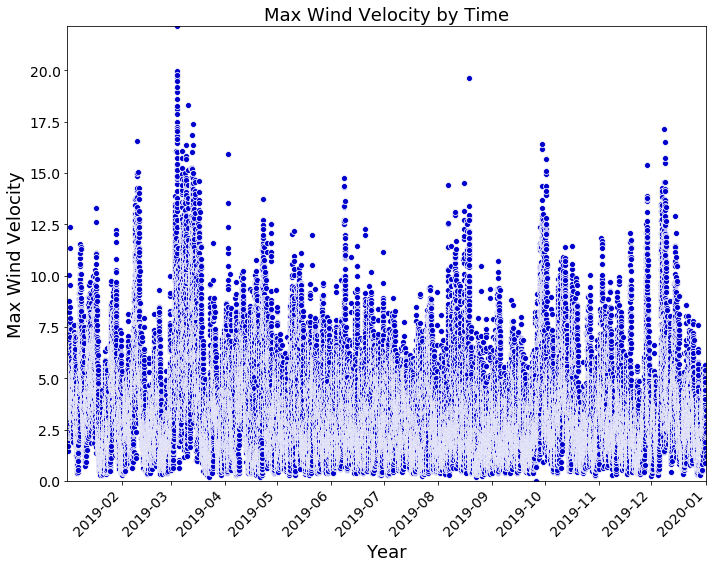

In [61]:
scatter_function(weather_data['date_time'], weather_data['max. wv (m/s)'], 'Max Wind Velocity by Time', 'Year', 'Max Wind Velocity')


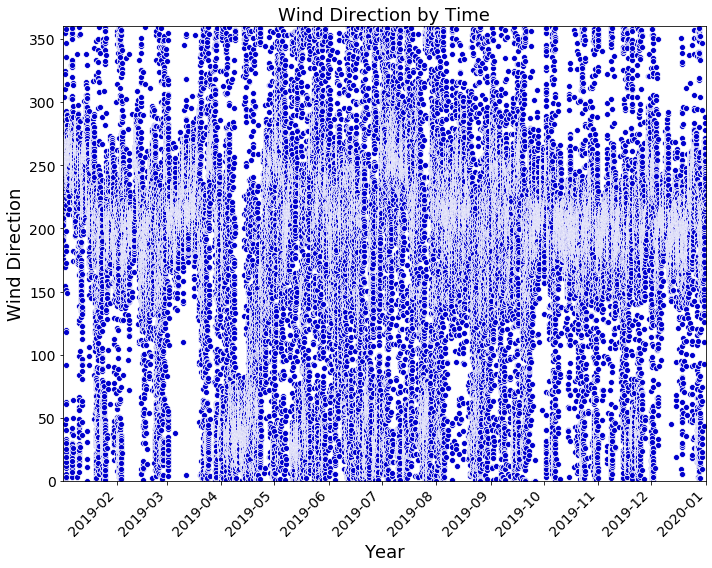

In [62]:
scatter_function(weather_data['date_time'], weather_data['wd (deg)'], 'Wind Direction by Time', 'Year', 'Wind Direction')
